In [1]:
import pandas as pd
from geopy import GoogleV3

from keys import g_key
geolocator = GoogleV3(api_key=g_key)

import folium
import json
import requests
from folium.features import DivIcon

from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

import contextily as ctx
import tempfile

## Cells are deactivated to avoid redundancy and maximize the speed that the notebook runs

## Importing the data files created above

In [2]:
df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv') 
df3 = pd.read_csv('df3.csv')
df4 = pd.read_csv('df4.csv')
df5 = pd.read_csv('df5.csv')

## Cleaning up the datasets, dropping unneeded columns

In [3]:
def drop_nan(a, b, c, d, e):
    a.dropna(inplace=True)
    a.reset_index(drop=True)
    b.dropna(inplace=True)
    b.reset_index(drop=True)
    c.dropna(inplace=True)
    c.reset_index(drop=True)
    d.dropna(inplace=True)
    d.reset_index(drop=True)
    e.dropna(inplace=True)
    e.reset_index(drop=True)

In [4]:
drop_nan(df1, df2, df3, df4, df5)

In [5]:
def drop_columns(a, b, c, d, e):
    a.drop(columns=['Address', 'City', 'State', 'Zipcode', 'Full Address', 'Sub-Program (Mariachi Institute, IDEA, T4T, TAT)'], inplace=True)
    b.drop(columns=['Address', 'City', 'State', 'Zipcode', 'Full Address', 'Sub-Program (AIR, A4A)'], inplace=True)
    c.drop(columns=['Address', 'City', 'State', 'Zipcode', 'Full Address'], inplace=True)
    d.drop(columns=['Address', 'City', 'State', 'Zipcode', 'Full Address', 'Sub-Program (TEAM; M4S, Ensemble, Camp, MC & SC)'], inplace=True)
    e.drop(columns=['Address', 'City', 'State', 'Zipcode', 'Full Address', 'Sub-Program (Fiesta, Sing-Along, Guitar Class, Posada)'], inplace=True)

In [6]:
drop_columns(df1, df2, df3, df4, df5)

In [7]:
def rename_col(a, b, c, d, e):
    a.rename(columns={'Name of Location (if applicable)' : 'Name'}, inplace=True)
    b.rename(columns={'Name of Location (if applicable)' : 'Name'}, inplace=True)
    c.rename(columns={'Name of Location (if applicable)' : 'Name'}, inplace=True)
    d.rename(columns={'Name of Location (if applicable)' : 'Name'}, inplace=True)
    e.rename(columns={'Name of Location (if applicable)' : 'Name'}, inplace=True)

In [8]:
rename_col(df1, df2, df3, df4, df5)

In [9]:
def export_file_2(a, b, c, d, e):
    a.to_csv('df_1.csv', index=False, header=True)
    b.to_csv('df_2.csv', index=False, header=True)
    c.to_csv('df_3.csv', index=False, header=True)
    d.to_csv('df_4.csv', index=False, header=True)
    e.to_csv('df_5.csv', index=False, header=True)

In [10]:
export_file_2(df1, df2, df3, df4, df5)

## Using Google Geolocator to find the lat/lng coordinates for each address

In [11]:
lat1 = []
lat2 = []
lat3 = []
lat4 = []
lat5 = []
lng1 = []
lng2 = []
lng3 = []
lng4 = []
lng5 = []

In [12]:
lat1.extend(df1.Latitude)
lat2.extend(df2.Latitude)
lat3.extend(df3.Latitude)
lat4.extend(df4.Latitude)
lat5.extend(df5.Latitude)

In [13]:
lng1.extend(df1.Longitude)
lng2.extend(df2.Longitude)
lng3.extend(df3.Longitude)
lng4.extend(df4.Longitude)
lng5.extend(df5.Longitude)

In [14]:
pro_dev = []
artists = []
performances = []
beyond = []
community = []

In [15]:
pro_dev.extend(df1['Name'])
artists.extend(df2['Name'])
performances.extend(df3['Name'])
beyond.extend(df4['Name'])
community.extend(df5['Name'])

## Defining custom colors for markers (python doesn't natively support using hex code colors)

In [16]:
def number_DivIcon(color):
    """ Create a 'numbered' icon
    
    """
    icon = DivIcon(
            icon_size=(0,0),
            icon_anchor=(0,0),
            html="""<span class="dot" style="background-color : {:s}; height: 7px; width: 7px; border-radius: 50%; display: inline-block;"></span>
                """.format(color)
        )
    return icon

In [17]:
col_hex = ['#52b3ce',
 '#d8355d',
 '#43348d',
'#669c52',
'#efd249']

## Building a geographical map with custom points for each lat/lng that reflects the distinctive colors used for the different programs

In [18]:
tile_1 = 'https://api.mapbox.com/styles/v1/jimmywhite87/cl5eakkkt000m15o9tpj14pu9/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1IjoiamltbXl3aGl0ZTg3IiwiYSI6ImNsNHV0cmI0YTFvamMza2xwMGpucHc3ODgifQ.Y86Fp2t5Xo02YBfXqJliKA'

attribution = '© <a href="https://www.mapbox.com/about/maps/">Mapbox</a> © <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> <strong><a href="https://www.mapbox.com/map-feedback/" target="_blank">Improve this map</a></strong>'

m = folium.Map(location=[lat1[0], lng1[0]], tiles=tile_1, attr = attribution)

for lats, long, name in zip(lat1, lng1, pro_dev):
    folium.Marker(location=[lats, long],
        popup = name,
        icon = number_DivIcon(col_hex[0])
     ).add_to(m)
for lats, long, name in zip(lat2, lng2, artists):
    folium.Marker(location=[lats, long],
        popup = name,
        icon = number_DivIcon(col_hex[1])
     ).add_to(m)
for lats, long, name in zip(lat3, lng3, performances):
    folium.Marker(location=[lats, long],
        popup = name,
        icon = number_DivIcon(col_hex[2])
     ).add_to(m)
for lats, long, name in zip(lat4, lng4, beyond):
    folium.Marker(location=[lats, long],
        popup = name,
        icon = number_DivIcon(col_hex[3])
     ).add_to(m)
for lats, long, name in zip(lat5, lng5, community):
    folium.Marker(location=[lats, long],
        popup = name,
        icon = number_DivIcon(col_hex[4])
     ).add_to(m)
m.fit_bounds([[38.828356, -122.340458], [38.086019, -122.856856]])
m

## Saving the figures both as an HTML/JavaScript object as well as a .jpg image file

In [19]:
m.save('sonoma_county.html')

## Because Illustrator is being used for the final product, this final section is simply a vector map of the geographical points discussed earlier which can be imported directly into Illustrator

In [21]:
geometry1 = [Point(xy) for xy in zip(lng1,lat1)]
geometry2 = [Point(xy) for xy in zip(lng2,lat2)]
geometry3 = [Point(xy) for xy in zip(lng3,lat3)]
geometry4 = [Point(xy) for xy in zip(lng4,lat4)]
geometry5 = [Point(xy) for xy in zip(lng5,lat5)]

In [22]:
geo_df1 = gpd.GeoDataFrame(geometry = geometry1)
geo_df2 = gpd.GeoDataFrame(geometry = geometry2)
geo_df3 = gpd.GeoDataFrame(geometry = geometry3)
geo_df4 = gpd.GeoDataFrame(geometry = geometry4)
geo_df5 = gpd.GeoDataFrame(geometry = geometry5)

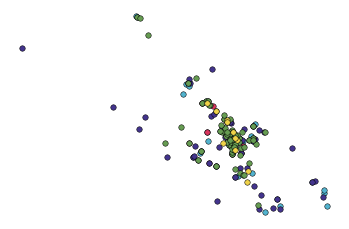

In [23]:
fig, ax = plt.subplots()

geo_df1.plot(ax=ax, marker='o', markersize=30, facecolor=col_hex[0], edgecolor='black', linewidth=0.5)
geo_df2.plot(ax=ax, marker='o', markersize=30, facecolor=col_hex[1], edgecolor='black', linewidth=0.5)
geo_df3.plot(ax=ax, marker='o', markersize=30, facecolor=col_hex[2], edgecolor='black', linewidth=0.5)
geo_df4.plot(ax=ax, marker='o', markersize=30, facecolor=col_hex[3], edgecolor='black', linewidth=0.5)
geo_df5.plot(ax=ax, marker='o', markersize=30, facecolor=col_hex[4], edgecolor='black', linewidth=0.5)

ax.axis('off')
fig.savefig('new.eps', format='eps', dpi=300)